In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import folium
from folium.features import Choropleth
from folium.plugins import HeatMap
import json
import geopy.distance # calculate distance between two points
import geopandas as gpd

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
df2 = pd.read_csv('listings.csv')
# pd.options.display.max_rows=1000
# np.transpose(df2[:2])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.merge(df,df2[['id','zipcode']],on='id', how='left')

In [5]:
# New dataframe with Zipcode column
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zipcode
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,11218
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,10018
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,10027
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,11238
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,10029
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,10016
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,11216
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,10019
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,10025
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,10002


In [6]:
# Price per room ranges from $0 to $10,000

In [7]:
# noted that the name of the airbnb and host_name are not relevant to this analysis so we can leave out these fields 
# last_review is NaN means there is no review - new listing - to remove this column
# reviews_per_month is NaN means there is no review as this is a new listing - to append to 0.0 review/month

# drop unused columns

df.drop(['host_name','last_review'], axis=1, inplace=True)
df.head(10)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zipcode
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,11218
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,10018
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,10027
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,11238
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,10029
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,10016
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,11216
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,10019
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,10025
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,10002


In [8]:
# Return a copy of the data
# with missing values filled or imputed
df.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
# look for null values 
df.isnull().sum()

id                                   0
name                                16
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
zipcode                           4698
dtype: int64

In [10]:
# remove NaNs
df = df[df.zipcode.notnull()].reset_index(drop=True)
# remove any zipcode that does not belong to NYC
df = df[(df['zipcode'].str[:1] == '1')]


In [11]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
zipcode                            0
dtype: int64

In [12]:
# Understanding the data 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria',
       'Clason Point',

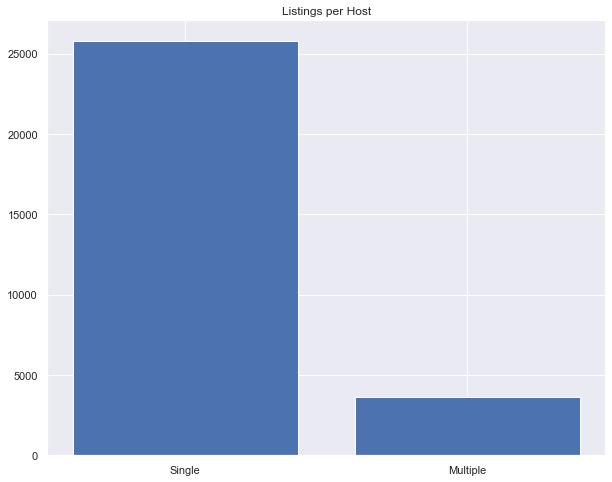

In [15]:
# Listings per Host
# Airbnb hosts can have multiple listings (as we can see above). A host can list separate rooms in the same apartment
# or multiple apartments or homes
listings_per_host=(df.host_id.value_counts() > 1).value_counts()

sns.set(rc={'figure.figsize':(10,8)})
plt.bar(x=['Single', 'Multiple'], height=listings_per_host.values)
plt.title('Listings per Host');

# There are approx 32,000 single listings and 5,000 multiple listings

In [16]:
# Among the host with multiple listings, we find the top host
top_host=df.host_id.value_counts().head(10)
top_host

219517861    294
30283594     115
16098958      81
61391963      80
22541573      65
107434423     59
7503643       51
1475015       48
2856748       47
120762452     46
Name: host_id, dtype: int64

In [17]:
# df[(df['host_id'] == 219517861)]

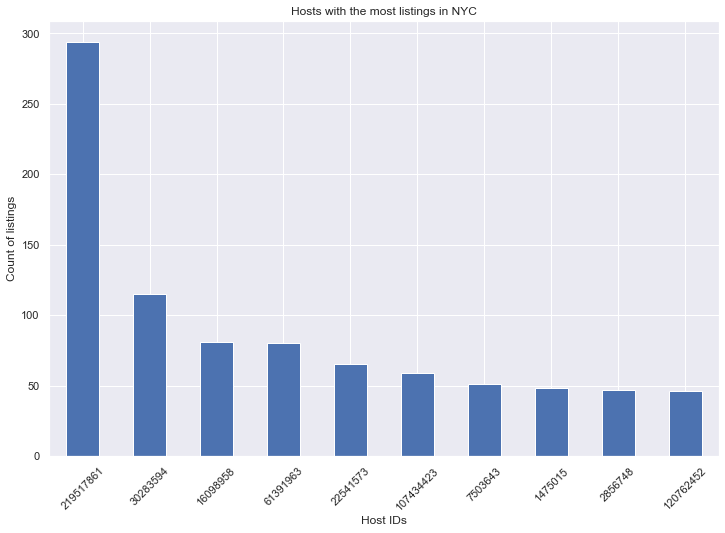

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
plot_1=top_host.plot(kind='bar')
plot_1.set_title('Hosts with the most listings in NYC')
plot_1.set_ylabel('Count of listings')
plot_1.set_xlabel('Host IDs')
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=45);

In [19]:
# find top neighborhood
top_neighbourhood_group=df.neighbourhood_group.value_counts().head(10)
top_neighbourhood_group

Manhattan        16580
Brooklyn         15399
Queens            3982
Bronx              760
Staten Island      266
Name: neighbourhood_group, dtype: int64

In [20]:
# Create a Folium heat map for rooms distribution in New York City 
# The majority of the rooms is in Manhattan and Brooklyn
room_map = folium.Map(location=[40.7128, -74.0060], 
                      zoom_start = 12)
data_map = df[['latitude', 'longitude']]
data_map = [[row['latitude'], row['longitude']] for index, row in data_map.iterrows()]
HeatMap(data_map, radius=10).add_to(room_map)

room_map

In [21]:
def detect_outliers(data_1):
    mean = data_1.mean()
    sd = data_1.std()
    upper_bound = mean + 3 * sd
    lower_bound = mean - 3 * sd
    outliers = (data_1 > upper_bound) | (data_1 < lower_bound)
    return outliers

In [22]:
# count number of outliers 
# df.groupby('neighbourhood_group', axis=0)['price'].apply(detect_outliers).value_counts()

In [23]:
# filter outliers by neighbourhood group
outliers_filtered = df.groupby('neighbourhood_group', axis=0)['price'].apply(detect_outliers)

In [24]:
df_filtered = df[~outliers_filtered]

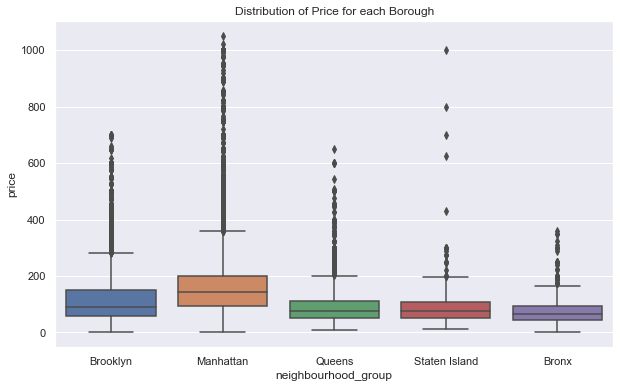

In [25]:
sns.set(rc={'figure.figsize':(10,8)})

plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', 
            y='price', 
            data=df_filtered,
              ).set_title('Distribution of Price for each Borough')
plt.show()

# It appears that Manhattan has the highest median price per night of approximately $150, 
# followed by Brooklyn with the median price per night of $90
# followed byStaten Island, Queens, and Bronx with the median price per night 
# of $75, $75, $65 per night, respectively. 

In [26]:
# Choropleth maps by median price
df_filtered.groupby(['neighbourhood'])['price'].agg('median')
geo_group=df_filtered.groupby('zipcode')
geo_agg=geo_group.agg({'price':np.median,
                      })
geo_agg.rename(columns = {'price':'median_price'}, inplace = True)
geo_agg.reset_index(inplace=True)
geo_agg

,zipcode,median_price
0,10001,163.0
1,10002,126.0
2,10002-2289,85.0
3,10003,159.0
4,10004,132.0
...,...,...
186,11691,50.0
187,11692,100.0
188,11692-2304,95.0
189,11693,125.0


In [27]:
# Load GeoJSON file
with open('nyu-2451-34509-geojson.json', 'r') as jsonFile:
    data=json.load(jsonFile)
ny_geo=data

In [28]:
def create_map(table, zips, mapped_feature, add_text = ''):
    # initiating a Folium map with NY's longitude and latitude
    m = folium.Map(location=[40.7128, -74.0060],
                   zoom_start=11)
    # creating a choropleth map
    m.choropleth(
        geo_data = ny_geo,
        fill_opacity = 0.9,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'properties.zcta',
        # first element contains location information, second element contains feature of interest
        columns = [zips, mapped_feature],
        # handling the missing values in the map
        nan_fill_color='white',
        nan_fill_opacity=0.4,
        fill_color = 'YlGn',
        legend_name = ' '.join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across New York',
        reset=True
    )
    folium.LayerControl().add_to(m)
    # save map with filename based on the feature of interest
    m.save(outfile = mapped_feature + '_map.html')
    return m

In [29]:
create_map(geo_agg, 'zipcode', 'median_price')

/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [30]:
# Location with higher location score tends to have better connectivity and thus have the higher 
# median price per night

In [31]:
# df_filtered.plot.scatter(x='longitude',y='latitude', c='price',
#                 cmap=plt.get_cmap('bwr'), colorbar=True, alpha=0.4);
# plt.title('Price distribution in New York');

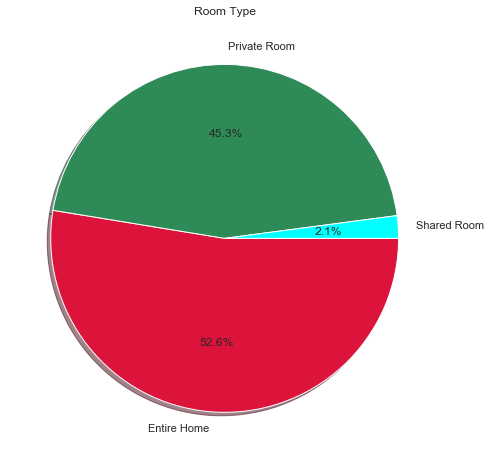

In [32]:
# Airbnb hosts can list entire homes/apartment, private room or shared rooms. 
top_room_type=df.room_type.value_counts().head(3)
plt.pie(top_room_type, colors=['crimson','seagreen','aqua'], 
        labels=['Entire Home', 'Private Room', 'Shared Room'],
        autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Room Type')
plt.show()

# Airbnb's uers do not like sharing room with others as we can see that it is only 2% of the listings
# Private room - a legal type of rental in New York, captures 46% of the listings
# Entire room captures 52% of the listings. This number is surprisingly high. New York state law regarding short-term
# housing stated that it is almost always illegal to rent a full apartment when the host is not present 
# for less than 30 days. 


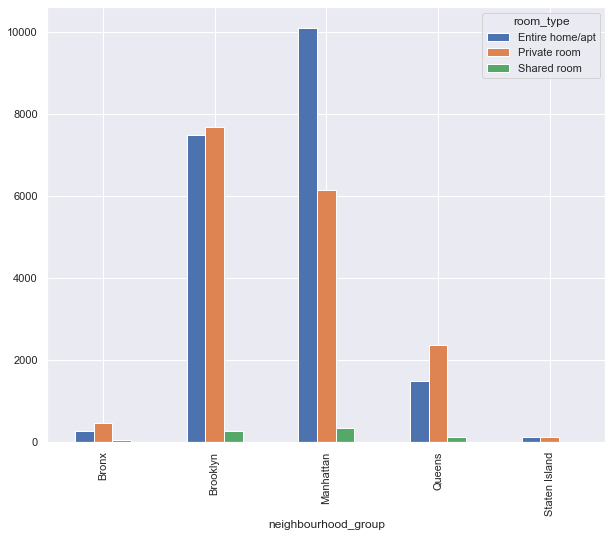

In [33]:
# the number of room listings in each room_type for 5 boroughs

# df.groupby(['neighbourhood_group', 'room_type'])['host_id'].agg('count').unstack('room_type').plot.bar(ax=ax)

# What kind of listings are there?
sns.set(rc={'figure.figsize':(10,8)})

fig, ax = plt.subplots()
df.groupby(['neighbourhood_group','room_type'])['host_id'].count().unstack('room_type').plot.bar(ax=ax);


In [34]:
# comment_words= ' '
# stopwords=set(STOPWORDS)

In [35]:
# # interate through the csv file
# for val in reviews['comments'].values[:100]: 
#     # typecaste each val to string
#     val=str(val)
#     # split the value
#     tokens=val.split()
#     # convert each token into lowercase
# #     for i in range(len(tokens)):
# #         tokens[i]=tokens[i].lower()
#     for words in tokens: 
#         comment_words=comment_words + ' '.join(tokens) + ' '

In [36]:
# comment_words

In [37]:
# wordcloud= WordCloud(max_font_size=50, background_color="white", stopwords=stopwords).generate(comment_words)

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [48]:
# Create a dataframe which contains the dependent variable 'price'

plt.figure(figsize=(15,15))
corr = df_filtered.corr().loc['price', ['minimum_nights', 'number_of_reviews', 'reviews_per_month']]
corr
# sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
# plt.title("correlation plot",size=28);

minimum_nights       0.020671
number_of_reviews   -0.052437
reviews_per_month   -0.044681
Name: price, dtype: float64

<Figure size 1080x1080 with 0 Axes>